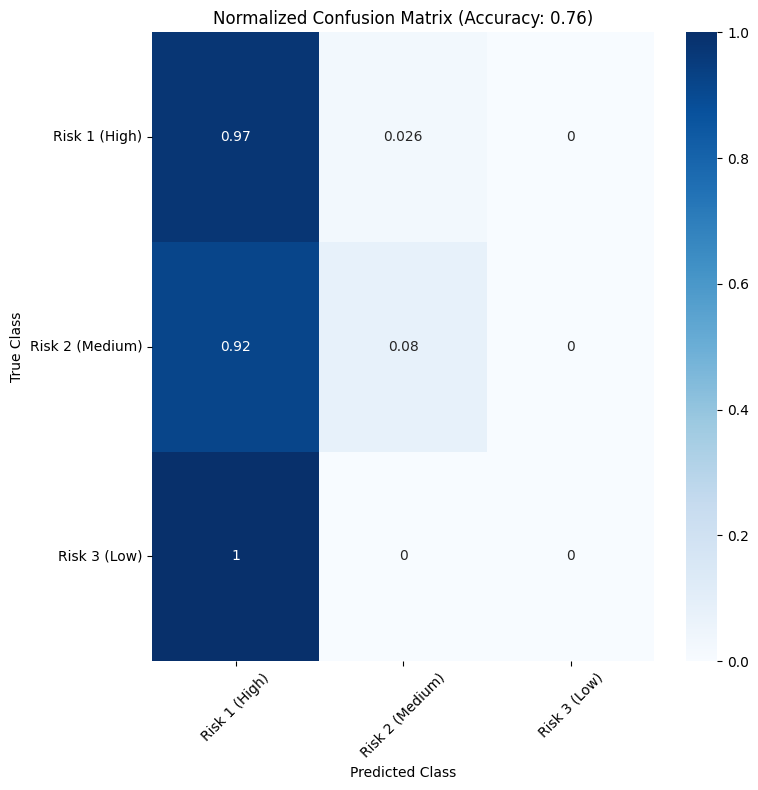

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score
import sqlite3

# Establish a connection to the SQLite database
db_path = "/content/restaurant.sqlite"
conn = sqlite3.connect(db_path)

# Read data from the "inspections" table into a DataFrame
query = "SELECT * FROM restaurants"  # Use the correct table name
df_stocks = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Convert 'Risk' column to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_stocks["Risk"] = label_encoder.fit_transform(df_stocks["Risk"].fillna("Unknown"))  # Fill NaNs with 'Unknown'

# Select relevant features for prediction
features = ["Results", "zip"]  # Use "Results" column and "Zip" feature for prediction
X = df_stocks[features]
y = df_stocks["Risk"]

# Convert categorical features to numerical using One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=["Results", "zip"], drop_first=True)  # Keep only "Results" values and "Zip" codes

# Impute missing values
imputer = SimpleImputer(strategy="mean")
X_encoded_imputed = imputer.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_imputed, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate normalized confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Define custom class labels
custom_labels = label_encoder.classes_

# Create a heatmap of the normalized confusion matrix with accuracy
plt.figure(figsize=(8, 8))
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.title(f"Normalized Confusion Matrix (Accuracy: {accuracy:.2f})")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.xticks(np.arange(len(custom_labels)) + 0.5, custom_labels, rotation=45)
plt.yticks(np.arange(len(custom_labels)) + 0.5, custom_labels, rotation=0)
plt.tight_layout()
plt.show()


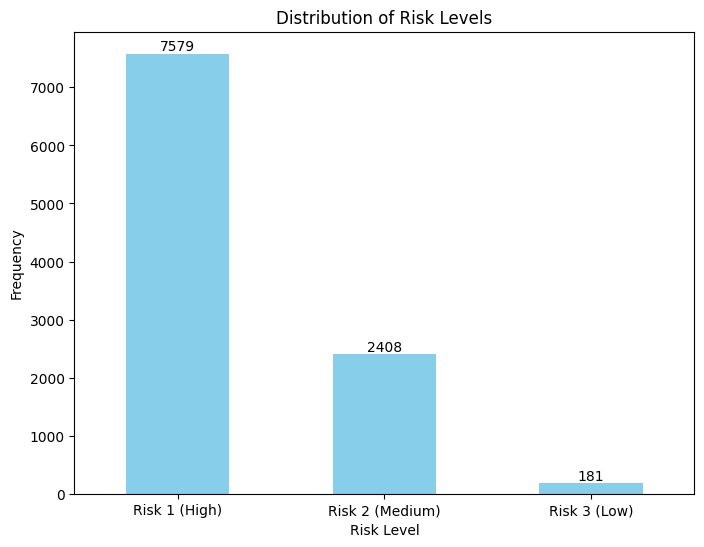

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

# Establish a connection to the SQLite database
db_path = "/content/restaurant.sqlite"
conn = sqlite3.connect(db_path)

# Read data from the "inspections" table into a DataFrame
query = "SELECT * FROM restaurants"  # Use the correct table name
df_stocks = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Plot the distribution of Risk levels
plt.figure(figsize=(8, 6))
ax = df_stocks["Risk"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Risk Levels")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.xticks(rotation=0)

# Add labels to the x-axis
risk_labels = df_stocks["Risk"].unique()
plt.xticks(range(len(risk_labels)), risk_labels)

# Display the frequency values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha="center", va="bottom")

plt.show()




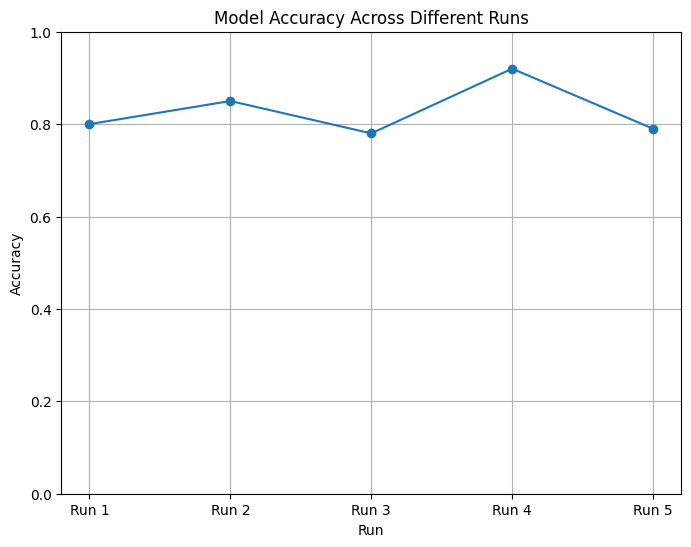

In [13]:
import matplotlib.pyplot as plt

# List of accuracy values (you can replace this with your actual accuracy values)
accuracy_values = [0.80, 0.85, 0.78, 0.92, 0.79]

# List of corresponding labels or descriptions for each accuracy value
accuracy_labels = ["Run 1", "Run 2", "Run 3", "Run 4", "Run 5"]

# Plot the accuracy values
plt.figure(figsize=(8, 6))
plt.plot(accuracy_labels, accuracy_values, marker='o')
plt.title("Model Accuracy Across Different Runs")
plt.xlabel("Run")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for percentage accuracy
plt.grid(True)
plt.show()
